In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from matplotlib import pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import unicodedata

In [2]:
df = pd.read_csv('db.csv', sep='\t')


In [3]:
print(df.shape)

(2994, 1)


In [4]:
df.head()

,Comment
0,Damn I thought they had strict gun laws in Ger...
1,I dont care about what it stands for or anythi...
2,It's not a group it's an idea lol
3,So it's not just America!
4,The dog is a spectacular dancer considering he...


**Data Preprocessing**

In [5]:
df["Comment"]=df["Comment"].str.lower()

In [6]:
df.head()

,Comment
0,damn i thought they had strict gun laws in ger...
1,i dont care about what it stands for or anythi...
2,it's not a group it's an idea lol
3,so it's not just america!
4,the dog is a spectacular dancer considering he...


In [7]:
df["Comment"].dtypes
df["Comment"]= df["Comment"].astype(str)
df.head()

,Comment
0,damn i thought they had strict gun laws in ger...
1,i dont care about what it stands for or anythi...
2,it's not a group it's an idea lol
3,so it's not just america!
4,the dog is a spectacular dancer considering he...


In [8]:
#remove punctuaions in text
df["Comment"] = df["Comment"].str.replace('[{}]'.format(string.punctuation), '',regex=True)
df.head()

,Comment
0,damn i thought they had strict gun laws in ger...
1,i dont care about what it stands for or anythi...
2,its not a group its an idea lol
3,so its not just america
4,the dog is a spectacular dancer considering he...


In [9]:
#remove stopwords
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df["Comment"] = df["Comment"].apply(lambda comment: ' '.join([word for word in word_tokenize(comment) if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df.head()

,Comment
0,damn thought strict gun laws germany
1,dont care stands anything connected like shields
2,group idea lol
3,america
4,dog spectacular dancer considering two left feet


**SENTIMENT ANALYSIS WITH TEXTBLOB and VADER**


> Finding Sentiment Polarity and Subjectivity











In [11]:
from textblob import TextBlob, Word

In [12]:
pol = lambda x:TextBlob(x).sentiment.polarity
subj = lambda x:TextBlob(x).sentiment.subjectivity

In [13]:
df["Polarity"]=df["Comment"].apply(pol)
df["Subjectivity"]=df["Comment"].apply(subj)

In [14]:
df.head()

,Comment,Polarity,Subjectivity
0,damn thought strict gun laws germany,0.0,0.00
1,dont care stands anything connected like shields,0.0,0.00
2,group idea lol,0.8,0.70
3,america,0.0,0.00
4,dog spectacular dancer considering two left feet,0.3,0.45


In [15]:
def Sentiment(text):
  if text.sentiment[0]<0:
    return "Negative"
  elif text.sentiment[0]>0:
    return "Positive"
  else:
    return "Neutral"


In [16]:
df["TextBlob Sentiment Analysis"]=df["Comment"].apply(lambda x: Sentiment(TextBlob(x)))

In [17]:
df.head()

,Comment,Polarity,Subjectivity,TextBlob Sentiment Analysis
0,damn thought strict gun laws germany,0.0,0.00,Neutral
1,dont care stands anything connected like shields,0.0,0.00,Neutral
2,group idea lol,0.8,0.70,Positive
3,america,0.0,0.00,Neutral
4,dog spectacular dancer considering two left feet,0.3,0.45,Positive


array([[<Axes: title={'center': 'Polarity'}>,
        <Axes: title={'center': 'Subjectivity'}>]], dtype=object)

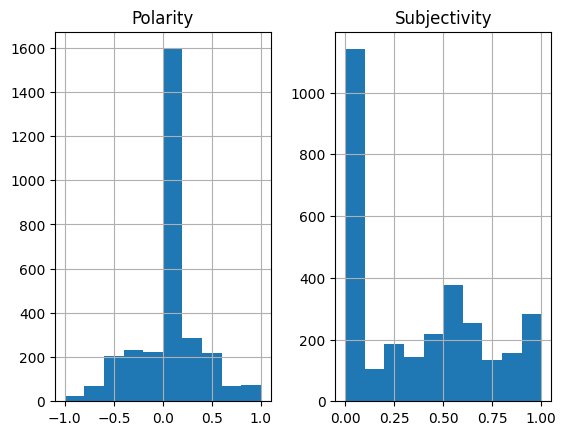

In [18]:
df.hist()

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install VADER_Sentiment
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
def Sentiment_Vader(scores):
    if scores['compound'] < 0:
        return "Negative"
    elif scores['compound'] > 0:
        return "Positive"
    else:
        return "Neutral"

In [21]:
sid = SentimentIntensityAnalyzer()

# Add a new column 'VADER_Sentiment' to store the sentiment scores

df['VADER_Sentiment_Scores'] = df['Comment'].apply(lambda comment: sid.polarity_scores(comment))

# Add a new column 'VADER Sentiment Analysis' to store the sentiment labels
df['VADER Sentiment Analysis'] = df['VADER_Sentiment_Scores'].apply(Sentiment_Vader)

In [22]:
df.head()

,Comment,Polarity,Subjectivity,TextBlob Sentiment Analysis,VADER_Sentiment_Scores,VADER Sentiment Analysis
0,damn thought strict gun laws germany,0.0,0.00,Neutral,"{'neg': 0.56, 'neu': 0.44, 'pos': 0.0, 'compou...",Negative
1,dont care stands anything connected like shields,0.0,0.00,Neutral,"{'neg': 0.259, 'neu': 0.494, 'pos': 0.247, 'co...",Negative
2,group idea lol,0.8,0.70,Positive,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",Positive
3,america,0.0,0.00,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,dog spectacular dancer considering two left feet,0.3,0.45,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
